In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from textblob import TextBlob
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("E:/Desktop/ITU/DATA_SCIENCE_ACADEMY/Project4/yelp_review_reorganized_1.csv")
df

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,iS-j0OirHNI9O0JsWS2-rA,4x3x0oGs9gcHCoQpqoI9hw,kJl3l4fSa2spv_Mkhgogmg,5,2007-09-20,I was introduced to this spacious and homey Fi...,5,3,1
1,zKYzD05XkGk85WKLuW3JYg,25zD4f-sLZpP4raa4u88Vg,gBfPyzPRmeOaj3SdcIj0Rw,4,2007-05-07,Another overpriced sushi joint in vegas where ...,1,0,0
2,IWo4h4DQXG5bwVU2Ddj9sA,s3kRi7b8t2sdtYcsMbqlJA,p6cPotjmAeI-o66BcKIoLQ,4,2007-06-18,My classmate opened up this restaurant! \n\nTh...,0,0,0
3,k_7jevNXm9WBrpro3njDAA,hyL8xZ-94jXcaqQt5hS14Q,_j2EtQtgLuXGRBfbM5YwZA,4,2007-08-06,Im always a bit skeptical about ridiculously h...,0,0,0
4,Q-UEtKLbtRjtypFOOgjeHg,xLldDRZe1DCTY-05-OIauA,-U7tvCtaraTQ9b0zBhpBMA,4,2007-04-03,I don't know...I really like the MGM Grand Buf...,1,3,4
...,...,...,...,...,...,...,...,...,...
19995,MGh99ZFMl4yWUMGSlOZE-A,ar-jniZj7xsn4t-ZR6RkTw,Awm9xctpNl-XrI4eN0mt6A,4,2007-02-07,If you love sushi and martinis this is the pla...,0,0,0
19996,YbkJ_An4d-OGCy122FR75Q,D8UMqhV2c4p8RGVmUMBGfg,oZcbn7ENit23xbCsyu9xbA,5,2007-11-11,So what can I say that hasn't already been yel...,3,1,4
19997,_baE6s8YfeaaRW4eHmUUMw,Q75Of3PHWC5TRxpiCDPozA,aCvSQs0wAIwYzdy21-De3w,5,2007-12-25,I am the owner and being prejustice here. If y...,0,0,0
19998,Bx8vYLNDTvuflPrSPhJ6Wg,1zeS9uLQ6Dc3mhtIUjKMbA,MWmuV3o6qcnYCktB755_-Q,5,2007-11-21,"Holy lucky find, Batman!\n\nI didn't even know...",3,3,4


In [3]:
df['customer_no'] = np.arange(len(df))

In [4]:
df["customer_no"] = df["customer_no"].apply(lambda x: "Customer" + str(x))

In [5]:
df = df.set_index("customer_no").reset_index()

In [6]:
df.drop(["review_id","user_id","business_id"], axis=1, inplace=True)

In [7]:
df

,customer_no,stars,date,text,useful,funny,cool
0,Customer0,5,2007-09-20,I was introduced to this spacious and homey Fi...,5,3,1
1,Customer1,4,2007-05-07,Another overpriced sushi joint in vegas where ...,1,0,0
2,Customer2,4,2007-06-18,My classmate opened up this restaurant! \n\nTh...,0,0,0
3,Customer3,4,2007-08-06,Im always a bit skeptical about ridiculously h...,0,0,0
4,Customer4,4,2007-04-03,I don't know...I really like the MGM Grand Buf...,1,3,4
...,...,...,...,...,...,...,...
19995,Customer19995,4,2007-02-07,If you love sushi and martinis this is the pla...,0,0,0
19996,Customer19996,5,2007-11-11,So what can I say that hasn't already been yel...,3,1,4
19997,Customer19997,5,2007-12-25,I am the owner and being prejustice here. If y...,0,0,0
19998,Customer19998,5,2007-11-21,"Holy lucky find, Batman!\n\nI didn't even know...",3,3,4


In [8]:
from langdetect import detect

In [9]:
for index, row in df['text'].iteritems():
    lang = detect(row) #detecting each row
    df.loc[index, 'Language'] = lang

In [10]:
pd.DataFrame(df.Language.value_counts())

,Language
en,19154
de,831
fr,9
da,3
it,1
af,1
no,1


In [11]:
df = df[df["Language"]=="en"]
df

,customer_no,stars,date,text,useful,funny,cool,Language
0,Customer0,5,2007-09-20,I was introduced to this spacious and homey Fi...,5,3,1,en
1,Customer1,4,2007-05-07,Another overpriced sushi joint in vegas where ...,1,0,0,en
2,Customer2,4,2007-06-18,My classmate opened up this restaurant! \n\nTh...,0,0,0,en
3,Customer3,4,2007-08-06,Im always a bit skeptical about ridiculously h...,0,0,0,en
4,Customer4,4,2007-04-03,I don't know...I really like the MGM Grand Buf...,1,3,4,en
...,...,...,...,...,...,...,...,...
19995,Customer19995,4,2007-02-07,If you love sushi and martinis this is the pla...,0,0,0,en
19996,Customer19996,5,2007-11-11,So what can I say that hasn't already been yel...,3,1,4,en
19997,Customer19997,5,2007-12-25,I am the owner and being prejustice here. If y...,0,0,0,en
19998,Customer19998,5,2007-11-21,"Holy lucky find, Batman!\n\nI didn't even know...",3,3,4,en


In [12]:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19154 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_no  19154 non-null  object        
 1   stars        19154 non-null  int64         
 2   date         19154 non-null  datetime64[ns]
 3   text         19154 non-null  object        
 4   useful       19154 non-null  int64         
 5   funny        19154 non-null  int64         
 6   cool         19154 non-null  int64         
 7   Language     19154 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 1.3+ MB


In [14]:
df["date"].describe()

count                   19154
unique                    365
top       2007-11-08 00:00:00
freq                      113
first     2007-01-01 00:00:00
last      2007-12-31 00:00:00
Name: date, dtype: object

In [15]:
#df.to_csv("E:/Desktop/yelp_new.csv", index=False)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19154 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_no  19154 non-null  object        
 1   stars        19154 non-null  int64         
 2   date         19154 non-null  datetime64[ns]
 3   text         19154 non-null  object        
 4   useful       19154 non-null  int64         
 5   funny        19154 non-null  int64         
 6   cool         19154 non-null  int64         
 7   Language     19154 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 1.3+ MB


In [17]:
df["stars"].value_counts()

4    7070
5    5949
3    3670
2    1525
1     940
Name: stars, dtype: int64

Text(0.5, 1.0, 'Star Distribution of The Comments')

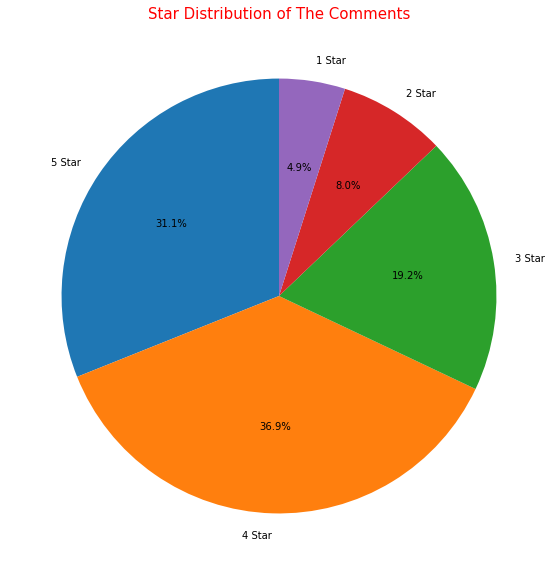

In [18]:
plt.figure(figsize = [15, 10])
label = '5 Star', '4 Star', '3 Star', '2 Star','1 Star'
star_count = [5950, 7069, 3671, 1525, 940]
plt.pie(star_count, labels=label, autopct='%1.1f%%', startangle=90)
plt.title("Star Distribution of The Comments", c="red", fontsize=15)
#plt.savefig('E:/Desktop/ITU/DATA_SCIENCE_ACADEMY/Project4/StarDistributionofComments1.png', dpi=200)

In [19]:
import re
import string

In [20]:
df["text"] = df["text"].apply(lambda x: re.sub("[%s]" % re.escape(string.punctuation), " ",x.lower())) # Remove punctuations and lower
df["text"] = df["text"].apply(lambda x: re.sub("\w*\d\w*", " ",x)) # Remove numbers
df["text"] = df["text"].apply(lambda x: re.sub("\n"," ",x)) # Remove \n

In [21]:
df["text"]

0        i was introduced to this spacious and homey fi...
1        another overpriced sushi joint in vegas where ...
2        my classmate opened up this restaurant    the ...
3        im always a bit skeptical about ridiculously h...
4        i don t know   i really like the mgm grand buf...
                               ...                        
19995    if you love sushi and martinis this is the pla...
19996    so what can i say that hasn t already been yel...
19997    i am the owner and being prejustice here  if y...
19998    holy lucky find  batman   i didn t even know t...
19999    buca de beppo is a great place to go with all ...
Name: text, Length: 19154, dtype: object

In [22]:
df

,customer_no,stars,date,text,useful,funny,cool,Language
0,Customer0,5,2007-09-20,i was introduced to this spacious and homey fi...,5,3,1,en
1,Customer1,4,2007-05-07,another overpriced sushi joint in vegas where ...,1,0,0,en
2,Customer2,4,2007-06-18,my classmate opened up this restaurant the ...,0,0,0,en
3,Customer3,4,2007-08-06,im always a bit skeptical about ridiculously h...,0,0,0,en
4,Customer4,4,2007-04-03,i don t know i really like the mgm grand buf...,1,3,4,en
...,...,...,...,...,...,...,...,...
19995,Customer19995,4,2007-02-07,if you love sushi and martinis this is the pla...,0,0,0,en
19996,Customer19996,5,2007-11-11,so what can i say that hasn t already been yel...,3,1,4,en
19997,Customer19997,5,2007-12-25,i am the owner and being prejustice here if y...,0,0,0,en
19998,Customer19998,5,2007-11-21,holy lucky find batman i didn t even know t...,3,3,4,en


In [29]:
def sentiment(star):
    if star >= 4:
        return "Positive"
    elif star == 3:
        return "Neutral"
    else:
        return "Negative"

In [32]:
df["sentiment"] = df["stars"].apply(sentiment)

In [33]:
df

,customer_no,stars,date,text,useful,funny,cool,Language,sentiment
0,Customer0,5,2007-09-20,i was introduced to this spacious and homey fi...,5,3,1,en,Positive
1,Customer1,4,2007-05-07,another overpriced sushi joint in vegas where ...,1,0,0,en,Positive
2,Customer2,4,2007-06-18,my classmate opened up this restaurant the ...,0,0,0,en,Positive
3,Customer3,4,2007-08-06,im always a bit skeptical about ridiculously h...,0,0,0,en,Positive
4,Customer4,4,2007-04-03,i don t know i really like the mgm grand buf...,1,3,4,en,Positive
...,...,...,...,...,...,...,...,...,...
19995,Customer19995,4,2007-02-07,if you love sushi and martinis this is the pla...,0,0,0,en,Positive
19996,Customer19996,5,2007-11-11,so what can i say that hasn t already been yel...,3,1,4,en,Positive
19997,Customer19997,5,2007-12-25,i am the owner and being prejustice here if y...,0,0,0,en,Positive
19998,Customer19998,5,2007-11-21,holy lucky find batman i didn t even know t...,3,3,4,en,Positive


In [34]:
df.sentiment.value_counts()

Positive    13019
Neutral      3670
Negative     2465
Name: sentiment, dtype: int64

In [35]:
df.stars.value_counts()

4    7070
5    5949
3    3670
2    1525
1     940
Name: stars, dtype: int64

In [36]:
df.groupby("stars").mean()

,useful,funny,cool
stars,,,
1,3.032979,1.993617,1.015957
2,2.203934,1.649180,1.087869
3,1.566485,1.082561,1.017711
4,1.632956,0.825601,1.179774
5,2.001009,0.892419,1.418894


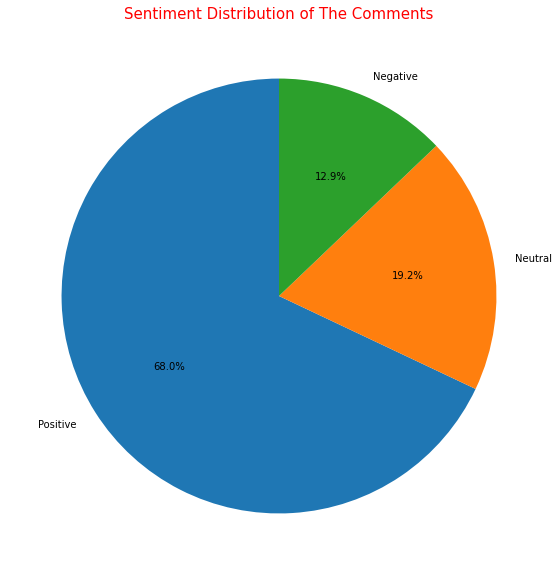

In [42]:
plt.figure(figsize = [15, 10])
label = 'Positive', 'Neutral', 'Negative'
star_count = [13019, 3670, 2465]
plt.pie(star_count, labels=label, autopct='%1.1f%%', startangle=90)
plt.title("Sentiment Distribution of The Comments", c="red", fontsize=15)
#plt.savefig('E:/Desktop/ITU/DATA_SCIENCE_ACADEMY/Project4/SentimentDistributionofComments1.png', dpi=200)

In [54]:
data = df.groupby('sentiment')[['useful','funny','cool']].mean()
data

,useful,funny,cool
sentiment,,,
Negative,2.520081,1.780527,1.060446
Neutral,1.566485,1.082561,1.017711
Positive,1.801137,0.856133,1.289039


In [58]:
data_new = data.reset_index()
data_new

,sentiment,useful,funny,cool
0,Negative,2.520081,1.780527,1.060446
1,Neutral,1.566485,1.082561,1.017711
2,Positive,1.801137,0.856133,1.289039


<Figure size 1080x720 with 0 Axes>

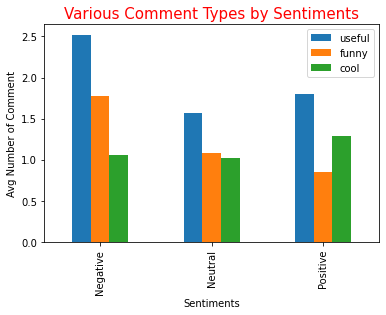

In [64]:
plt.figure(figsize = [15, 10])

data_new.plot(x="sentiment", y=["useful","funny", "cool"], kind="bar")
 
plt.xlabel("Sentiments")
plt.ylabel("Avg Number of Comment")
plt.title("Various Comment Types by Sentiments", c="red", fontsize=15)
#plt.savefig('E:/Desktop/ITU/DATA_SCIENCE_ACADEMY/Project4/CommentTypesbySentiments1.png', dpi=200)

In [73]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [74]:
n2_bigrams = get_top_n_gram(df['text'],(2,2),20)
n3_bigrams = get_top_n_gram(df['text'],(3,3),20)

In [75]:
n2_bigrams

[('las vegas', 1096),
 ('pretty good', 986),
 ('great place', 764),
 ('really good', 754),
 ('don know', 659),
 ('ice cream', 624),
 ('feel like', 585),
 ('food good', 524),
 ('happy hour', 413),
 ('make sure', 392),
 ('ve seen', 391),
 ('good food', 390),
 ('don think', 350),
 ('good place', 342),
 ('love place', 335),
 ('dance floor', 309),
 ('years ago', 308),
 ('staff friendly', 308),
 ('highly recommend', 308),
 ('strip mall', 295)]

In [76]:
n3_bigrams

[('cirque du soleil', 149),
 ('food pretty good', 109),
 ('love love love', 68),
 ('let just say', 63),
 ('don feel like', 62),
 ('sweet potato fries', 55),
 ('food really good', 53),
 ('makes feel like', 48),
 ('food good service', 44),
 ('free wi fi', 44),
 ('las vegas strip', 44),
 ('staff friendly helpful', 42),
 ('french onion soup', 40),
 ('pretty damn good', 40),
 ('flat screen tv', 37),
 ('pretty darn good', 37),
 ('vanilla ice cream', 36),
 ('just make sure', 36),
 ('hard rock hotel', 36),
 ('really really good', 36)]

In [83]:
df_negative = df[df["sentiment"]=="Negative"]
df_positive = df[df["sentiment"]=="Positive"]
df_neutral = df[df["sentiment"]=="Neutral"]

In [85]:
n2_bigrams_negative = get_top_n_gram(df_negative['text'],(2,2),20)
n3_bigrams_negative = get_top_n_gram(df_negative['text'],(3,3),20)

In [125]:
n2_bigrams_neutral = get_top_n_gram(df_neutral['text'],(2,2),20)
n3_bigrams_neutral = get_top_n_gram(df_neutral['text'],(3,3),20)

In [86]:
n2_bigrams_positive = get_top_n_gram(df_positive['text'],(2,2),20)
n3_bigrams_positive = get_top_n_gram(df_positive['text'],(3,3),20)

In [89]:
n3_bigrams_positive

[('cirque du soleil', 112),
 ('food pretty good', 67),
 ('love love love', 67),
 ('makes feel like', 41),
 ('don feel like', 40),
 ('food really good', 40),
 ('let just say', 38),
 ('sweet potato fries', 36),
 ('staff friendly helpful', 34),
 ('pretty damn good', 34),
 ('food good service', 32),
 ('free wi fi', 32),
 ('really really good', 32),
 ('great food great', 31),
 ('pretty darn good', 29),
 ('really like place', 28),
 ('las vegas strip', 28),
 ('service great food', 27),
 ('good food good', 26),
 ('king crab legs', 26)]

In [126]:
n3_bigrams_neutral

[('food pretty good', 37),
 ('cirque du soleil', 21),
 ('hot hot hot', 19),
 ('don feel like', 18),
 ('sweet potato fries', 15),
 ('vanilla ice cream', 14),
 ('french onion soup', 13),
 ('actually pretty good', 13),
 ('place pretty good', 13),
 ('drama drama drama', 13),
 ('food good service', 12),
 ('happy hour specials', 11),
 ('food just ok', 11),
 ('food really good', 11),
 ('new york new', 10),
 ('york new york', 10),
 ('don know place', 10),
 ('service pretty good', 10),
 ('flat screen tv', 9),
 ('hot sour soup', 9)]

In [90]:
n3_bigrams_negative

[('let just say', 17),
 ('cirque du soleil', 16),
 ('las vegas strip', 14),
 ('non smoking room', 13),
 ('really wanted like', 8),
 ('hot sour soup', 8),
 ('took long time', 7),
 ('couple years ago', 7),
 ('stay away place', 7),
 ('heard good things', 7),
 ('bad taste mouth', 7),
 ('hard rock hotel', 7),
 ('marin door door', 7),
 ('best thing say', 7),
 ('food took forever', 6),
 ('food just ok', 6),
 ('spicy tuna roll', 6),
 ('didn feel like', 6),
 ('food tastes like', 6),
 ('pork lau lau', 6)]

# Data Modeling

In [65]:
X = df.text
y = df.sentiment

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
# The first document-term matrix has default Count Vectorizer values - counts of unigrams
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english')

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names()).head()

,aa,aaa,aaaaaaaauuuuuuuuurrrrrriiiiiitttttttttte,aaaaaaaggggggg,aaaaah,aaaaargh,aaaamazing,aaaand,aaaayyyyyyyyyyy,aaah,...,zunamity,zune,zuzus,zygotes,zyr,zzz,zzzz,zzzzz,zzzzzzzzz,zzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Logistic Regression Classifier

In [91]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [92]:
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)

In [105]:
# Create a function to calculate the error metrics, since we'll be doing this several times
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['Pred_Negative','Pred_Neutral', 'Pred_Positive'], 
                yticklabels=['Act_Negative','Act_Neutral', 'Act_Positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    a_neg, a_neu, a_pos = cm[0]
    b_neg, b_neu, b_pos = cm[1]
    c_neg, c_neu, c_pos = cm[2]

    accuracy = round((a_neg + b_neu + c_pos) / (a_neg+a_neu+a_pos + b_neg+b_neu+b_pos + c_neg+c_neu+c_pos),2)
    negative = round((a_neg) / (a_neg+a_neu+a_pos),2)
    neutral = round((b_neu) / (b_neg+b_neu+b_pos),2)
    positive = round((c_pos) / (c_neg+c_neu+c_pos),2)

    cm_results = [accuracy, negative, neutral, positive]
    return cm_results

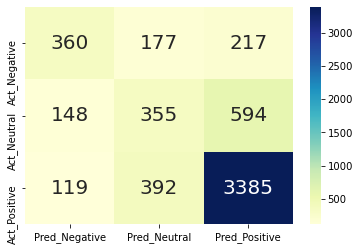

In [106]:
# The heat map for the first logistic regression model
cm1 = conf_matrix(y_test, y_pred_cv1)

## Naive Bayes Classifier

In [107]:
# Fit the first Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_cv1, y_train)

y_pred_cv1_nb = mnb.predict(X_test_cv1)

In [111]:
# Fit the second Naive Bayes model
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train_cv1, y_train)

y_pred_cv2_nb = bnb.predict(X_test_cv1)

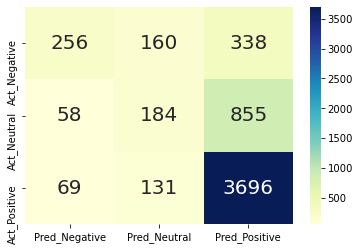

In [109]:
# Here's the heat map for the first Naive Bayes model
cm3 = conf_matrix(y_test, y_pred_cv1_nb)

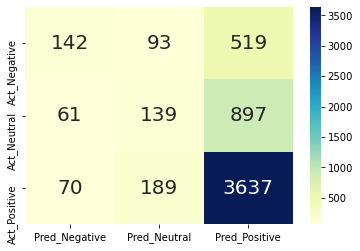

In [112]:
# Here's the heat map for the second Naive Bayes model
cm4 = conf_matrix(y_test, y_pred_cv2_nb)

## KNN Classifier

In [114]:
from sklearn.neighbors import KNeighborsClassifier
# Fit the first KNN model
knn = KNeighborsClassifier(3)
knn.fit(X_train_cv1, y_train)

y_pred_cv1_knn = knn.predict(X_test_cv1)

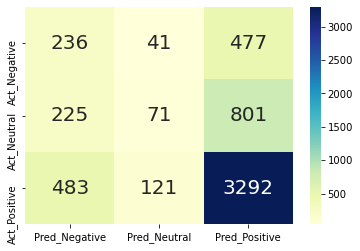

In [115]:
cm5 = conf_matrix(y_test, y_pred_cv1_knn)

## Try using TF-IDF instead of Count Vectorizer

In [116]:
# Create TF-IDF versions of the Count Vectorizers created earlier in the exercise
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)

## Logistic Regression

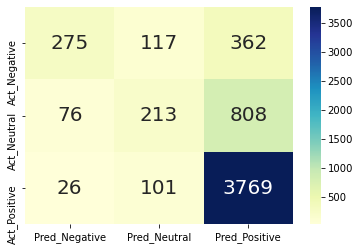

In [117]:
# Fit the first logistic regression on the TF-IDF data
lr.fit(X_train_tfidf1, y_train)
y_pred_tfidf1_lr = lr.predict(X_test_tfidf1)
cm6 = conf_matrix(y_test, y_pred_tfidf1_lr)

## Naive Bayes

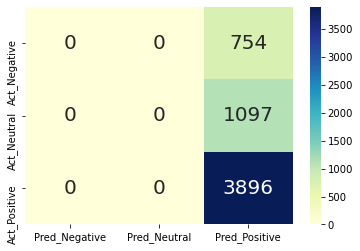

In [121]:
# Fit the first Naive Bayes model on the TF-IDF data
mnb.fit(X_train_tfidf1.toarray(), y_train)
y_pred_tfidf1_nb = mnb.predict(X_test_tfidf1)
cm7 = conf_matrix(y_test, y_pred_tfidf1_nb)

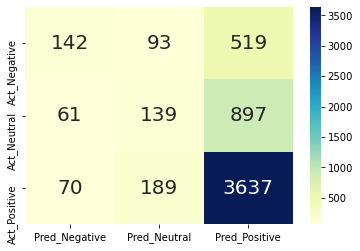

In [120]:
# Fit the second Naive Bayes model on the TF-IDF data
bnb.fit(X_train_tfidf1.toarray(), y_train)
y_pred_tfidf2_nb = bnb.predict(X_test_tfidf1)
cm8 = conf_matrix(y_test, y_pred_tfidf2_nb)

## KNN

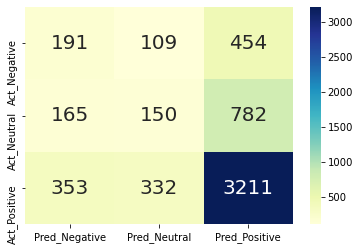

In [122]:
# Fit the first KNN model
knn = KNeighborsClassifier(3)
knn.fit(X_train_tfidf1.toarray(), y_train)
y_pred_cv1_tfidf_knn = knn.predict(X_test_tfidf1)
cm9 = conf_matrix(y_test, y_pred_cv1_tfidf_knn)

In [124]:
# Compile all of the error metrics into a dataframe for comparison
results_tf = pd.DataFrame(list(zip(cm1, cm3, cm4, cm5, cm6, cm7, cm8, cm9)))
results_tf = results_tf.set_index([['Accuracy', 'Negative Accuracy', 'Neutral Accuracy', 'Positive Accuracy']])
results_tf.columns = ['LR_CV', 'MNB_CV', 'BNB_CV', 'KNN_CV', 'LR_TFIDF', 'MNB_TFIDF', 'BNB_TFIDF', 'KNN_TFIDF']
results_tf

,LR_CV,MNB_CV,BNB_CV,KNN_CV,LR_TFIDF,MNB_TFIDF,BNB_TFIDF,KNN_TFIDF
Accuracy,0.71,0.72,0.68,0.63,0.74,0.68,0.68,0.62
Negative Accuracy,0.48,0.34,0.19,0.31,0.36,0.00,0.19,0.25
Neutral Accuracy,0.32,0.17,0.13,0.06,0.19,0.00,0.13,0.14
Positive Accuracy,0.87,0.95,0.93,0.84,0.97,1.00,0.93,0.82
